# Setup

In [1]:
# initial setup
import pandas as pd
orders_df = pd.read_csv("data/Orders.csv")
orders_df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [2]:
# fix rownames
orders_df.columns = orders_df.columns.str.lower().str.replace(".", "_")
orders_df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'postal_code', 'city',
       'state', 'country', 'region', 'market', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

# Problem 1

In [3]:
# problem 1, look at profit and sales 
print(orders_df.sales.head(5))
print(orders_df.profit.head(5))
# need to remove $ and convert from obj (very generic) to numeric

0      $221.98
1    $3,709.40
2    $5,175.17
3    $2,892.51
4    $2,832.96
Name: sales, dtype: object
0      $62.15
1    -$288.77
2     $919.97
3     -$96.54
4     $311.52
Name: profit, dtype: object


In [4]:
# fixed sales
orders_df.sales = pd.to_numeric(orders_df.sales.str.replace("$", "").str.replace(",",""))

51290
0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
5    2862.68
6    1822.08
7    5244.84
8     341.96
9      48.71
Name: sales, dtype: float64


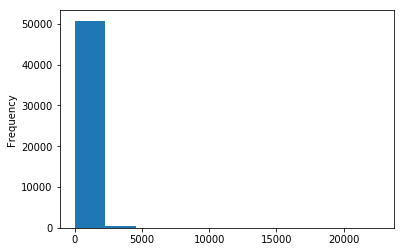

In [39]:
# checking against NAs
orders_df.sales.head(5)
orders_df.sales.plot(kind='hist')
print(len(orders_df.sales))
print(orders_df.sales.head(10))

In [6]:
#fix profit
orders_df.profit = pd.to_numeric(orders_df.profit.str.replace("$", "").str.replace(",",""))

In [7]:
orders_df.profit.head(5)

0     62.15
1   -288.77
2    919.97
3    -96.54
4    311.52
Name: profit, dtype: float64

# Problem 2

In [8]:
orders_df.order_date.head(5)

0    11/11/14
1      2/5/14
2    10/17/14
3     1/28/14
4     11/5/14
Name: order_date, dtype: object

In [11]:
#have to convert object to datetime 
orders_df.order_date = pd.to_datetime(orders_df.order_date)
orders_df.ship_date = pd.to_datetime(orders_df.ship_date)

In [12]:
print(orders_df.order_date.head(2))
print(orders_df.ship_date.head(2))

0   2014-11-11
1   2014-02-05
Name: order_date, dtype: datetime64[ns]
0   2014-11-13
1   2014-02-07
Name: ship_date, dtype: datetime64[ns]


In [27]:
#mutate a new column for grouping by quarter
orders_df_2 = orders_df.order_date.dt.quarter
orders_df['order_quarter'] = orders_df_2

In [28]:
orders_df.quantity.head(2)

0    2
1    9
Name: quantity, dtype: int64

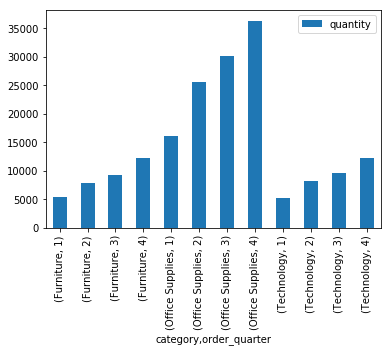

In [62]:
# investigating category, order_quarte
quarterly_orders = orders_df.groupby(['category', 'order_quarter'])[['quantity']].agg('sum')
quarterly_orders
quarterly_orders.plot(kind = 'bar')

Grouped by category and the fiscal quarter, you can see that there are significant increases in item purchases as the year progresses. Are there specific types of products that drive this growth?

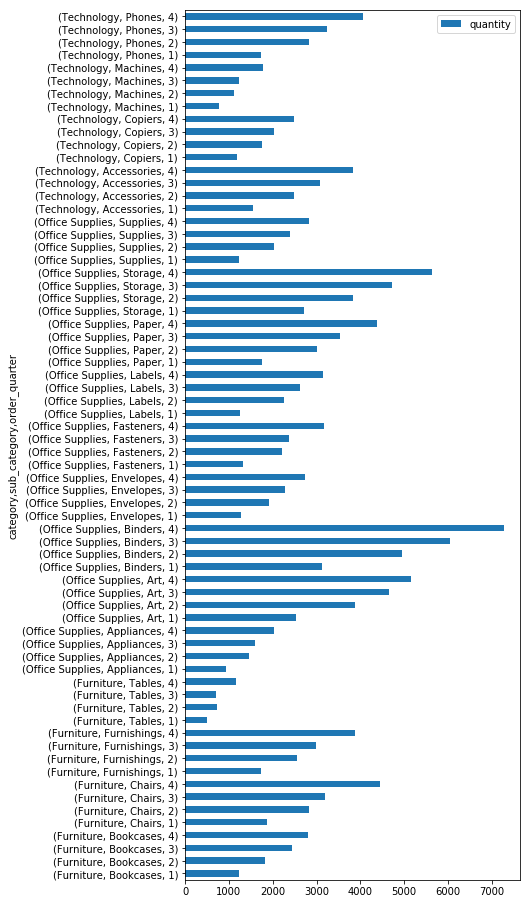

In [56]:
quarterly_sub_orders = orders_df.groupby(['category', 'sub_category', 'order_quarter'])[['quantity']].agg('sum')
quarterly_sub_orders
quarterly_sub_orders.plot(kind = 'barh', figsize=[6,16])

Office supplies are a BIG seller as Q1 to Q4.
Furniture, tables do not increase dramatically over time. 
Subcategories and categories differ in their sales changes by quarter, but in most cases, trend is upwards as time progresses from Q1 to Q4.

# Problem 3

In [63]:
returns_df = pd.read_csv("data/Returns.csv")
returns_df.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania
